### Feature Selection Approach

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import LeaveOneOut

In [3]:
data = pd.read_csv('../data/data.csv')

In [4]:
X,y = data.drop('Estado al egreso', axis=1), data['Estado al egreso']

In [5]:
import pickle as pkl

with open('../models/rf.pkl', 'rb') as file:
    best_rf = pkl.load(file)


with open('../models/lr.pkl', 'rb') as file:
    best_lr = pkl.load(file)


The analysis focused on model-derived feature importances to identify the most predictive variables.This methodology ensures selected features truly drive predictions while maintaining interpretability.

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

best_rf.fit(X_scaled, y)

coefs = best_rf.feature_importances_
importances_rf = pd.Series(np.abs(coefs), index=X.columns).sort_values(ascending=False)
print(importances_rf)

Sofa                                           0.352717
# de hemoderivados  usados                     0.270039
componentes triada letal                       0.109430
Daño orgánico tubular asociado                 0.060579
Edad                                           0.055069
App Cardiopatía Isquémica                      0.050000
Apache II                                      0.044931
Número de compresas utilizadas                 0.019382
VAM                                            0.017949
Horas transcurridas al desempaquetamiento      0.014193
App HTA                                        0.005711
Etiología del empaquetamiento                  0.000000
App AB                                         0.000000
Sexo                                           0.000000
Lesión de vía biliar asociada                  0.000000
Presencia de hipotensión arterial o shock      0.000000
Tiempo quirúrgico                              0.000000
App DM                                         0

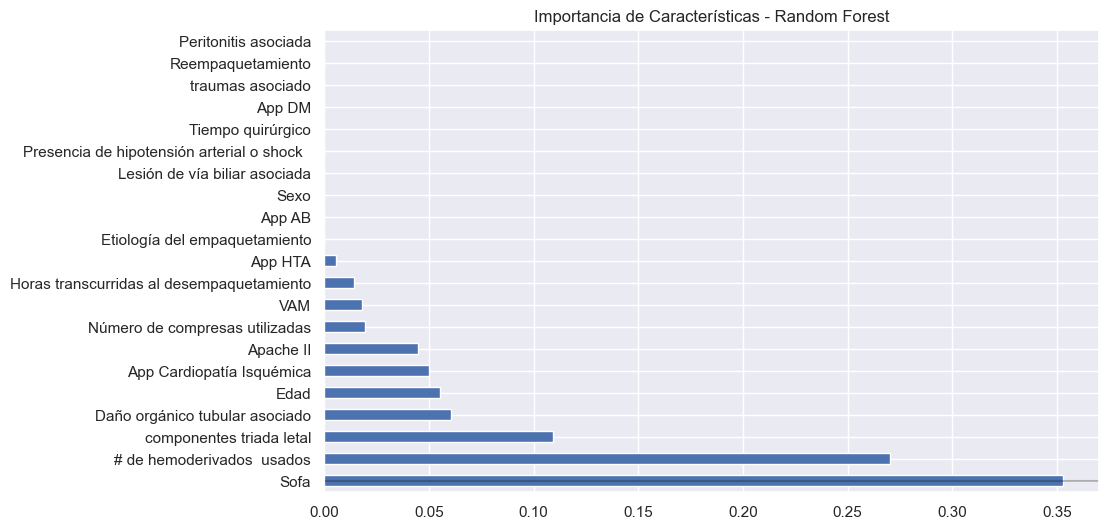

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.set(style='darkgrid')
importances_rf.plot(kind='barh')

plt.title('Importancia de Características - Random Forest')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.show()

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': best_rf.feature_importances_,
    'Abs_Coefficient': np.abs(best_rf.feature_importances_)
}).sort_values('Abs_Coefficient', ascending=False)


In [8]:
best_lr.fit(X_scaled, y)

coefs = best_lr.coef_[0]
importances_lr = pd.Series(np.abs(coefs), index=X.columns).sort_values(ascending=False)
print(importances_lr)

componentes triada letal                       0.196777
Sofa                                           0.184955
VAM                                            0.158918
Apache II                                      0.131098
App Cardiopatía Isquémica                      0.127576
Horas transcurridas al desempaquetamiento      0.105114
# de hemoderivados  usados                     0.094480
traumas asociado                               0.093495
Daño orgánico tubular asociado                 0.090667
Sexo                                           0.077167
App HTA                                        0.070436
Número de compresas utilizadas                 0.063096
Lesión de vía biliar asociada                  0.051951
App AB                                         0.038569
Presencia de hipotensión arterial o shock      0.035157
Tiempo quirúrgico                              0.022660
Reempaquetamiento                              0.019734
Peritonitis asociada                           0

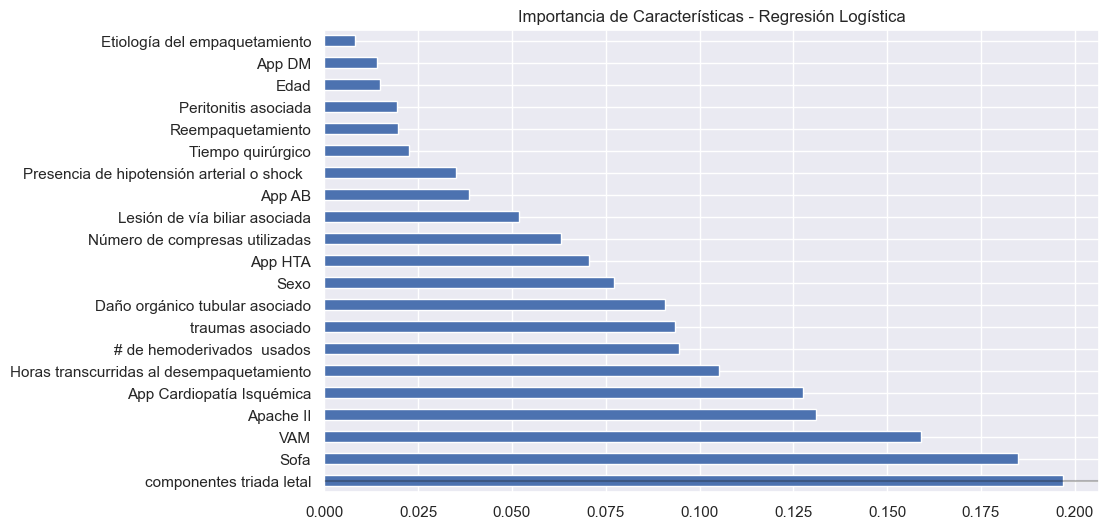

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.set(style='darkgrid')
importances_lr.plot(kind='barh')

plt.title('Importancia de Características - Regresión Logística')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.show()

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': best_lr.coef_[0],
    'Abs_Coefficient': np.abs(best_lr.coef_[0])
}).sort_values('Abs_Coefficient', ascending=False)


Consensus importance is a technique to combine feature importance rankings from different types of models to identify robust features that consistently impact predictions. It's particularly valuable for small datasets where random noise can distort individual model interpretations.

In [10]:
rf_norm = importances_rf / importances_rf.max()
lr_norm = importances_lr / importances_lr.abs().max()

common_features = rf_norm.index.intersection(lr_norm.index)

feature_consensus = pd.DataFrame({
    'Feature': common_features,
    'RF_importance': rf_norm[common_features].values,
    'LR_importance': lr_norm[common_features].values,
    'Consensus': (rf_norm[common_features].values + lr_norm[common_features].values) / 2
})

feature_consensus = feature_consensus.sort_values('Consensus', ascending=False)

feature_consensus


,Feature,RF_importance,LR_importance,Consensus
0,Sofa,1.000000,0.939922,0.969961
2,componentes triada letal,0.310250,1.000000,0.655125
1,# de hemoderivados usados,0.765597,0.480138,0.622868
8,VAM,0.050887,0.807603,0.429245
6,Apache II,0.127385,0.666224,0.396804
5,App Cardiopatía Isquémica,0.141757,0.648329,0.395043
3,Daño orgánico tubular asociado,0.171749,0.460762,0.316256
9,Horas transcurridas al desempaquetamiento,0.040240,0.534179,0.287209
18,traumas asociado,0.000000,0.475130,0.237565
13,Sexo,0.000000,0.392155,0.196077


In [11]:
top_features = feature_consensus.sort_values('Consensus', ascending=False)['Feature'].to_list()


#### Optimal feature analysis

In [12]:
from sklearn.metrics import f1_score

loo = LeaveOneOut()

k_values = range(1, len(top_features) + 1)
k_results = {'k': [], 'rf_f1': [], 'lr_f1': []}

for k in k_values:
    selected_features = top_features[:k]
    X_k = X[selected_features]
    
    rf_preds = []
    for train_idx, test_idx in loo.split(X_k):
        best_rf.fit(X_k.iloc[train_idx], y.iloc[train_idx])
        rf_preds.append(best_rf.predict(X_k.iloc[test_idx])[0])

    rf_f1 = f1_score(y, rf_preds)
    
    lr_preds = []
    for train_idx, test_idx in loo.split(X_k):
        best_lr.fit(X_k.iloc[train_idx], y.iloc[train_idx])
        lr_preds.append(best_lr.predict(X_k.iloc[test_idx])[0])
        
    lr_f1 = f1_score(y, lr_preds)
    
    k_results['k'].append(k)
    k_results['rf_f1'].append(rf_f1)
    k_results['lr_f1'].append(lr_f1)

optimal_k = {}
for model in ['rf', 'lr']:
    best_idx = np.argmax(k_results[f'{model}_f1'])
    optimal_k[model] = {
        'k': k_values[best_idx],
        'f1': k_results[f'{model}_f1'][best_idx]
    }

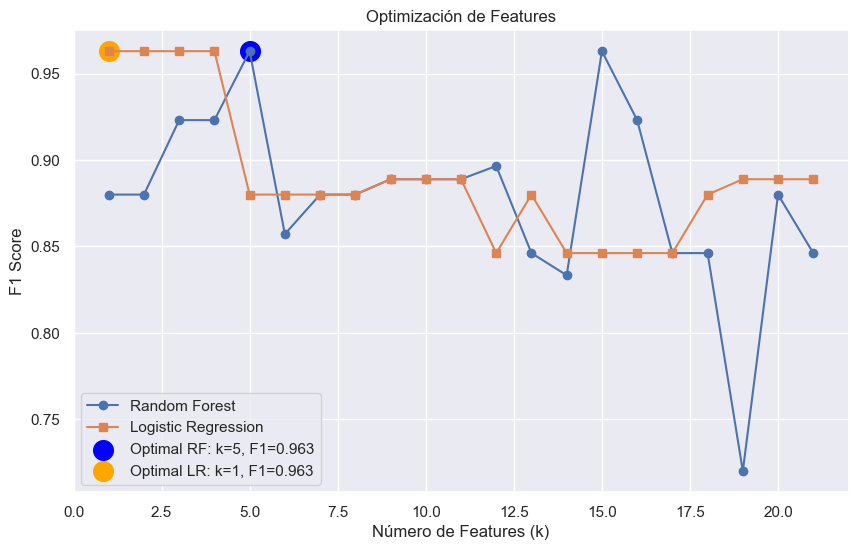

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(k_results['k'], k_results['rf_f1'], 'o-', label='Random Forest')
plt.plot(k_results['k'], k_results['lr_f1'], 's-', label='Logistic Regression')

for model, color in zip(['rf', 'lr'], ['blue', 'orange']):
    k_opt = optimal_k[model]['k']
    f1_opt = optimal_k[model]['f1']
    plt.scatter(k_opt, f1_opt, s=200, color=color, 
                label=f'Optimal {model.upper()}: k={k_opt}, F1={f1_opt:.3f}')

plt.xlabel('Número de Features (k)')
plt.ylabel('F1 Score')
plt.title('Optimización de Features')
plt.legend()
plt.grid(True)
plt.show()

#### The analysis revealed:

- Random Forest achieved peak performance (F1 = 0.963) using 5 key features

- Logistic Regression matched the score (F1 = 0.963) but with only 1 feature

While both models delivered similar metrics, relying on just one clinical variable (Logistic Regression) is insufficient for robust medical analysis. 
Random Forest was selected due to it maintains high performance while providing the multi-factorial perspective essential in critical care medicine.

In [14]:
features = top_features[:5]
features

['Sofa',
 'componentes triada letal',
 '# de hemoderivados  usados',
 'VAM',
 'Apache II']

In [19]:
from sklearn.ensemble import RandomForestClassifier

best_rf = RandomForestClassifier(class_weight='balanced', max_depth=2, min_samples_leaf=3,
                       min_samples_split=10, n_estimators=20, random_state=1).fit(X[features], y)

In [21]:
with open('../models/new_rf.pkl', 'wb') as file:
    pkl.dump(best_rf, file)

<Axes: >

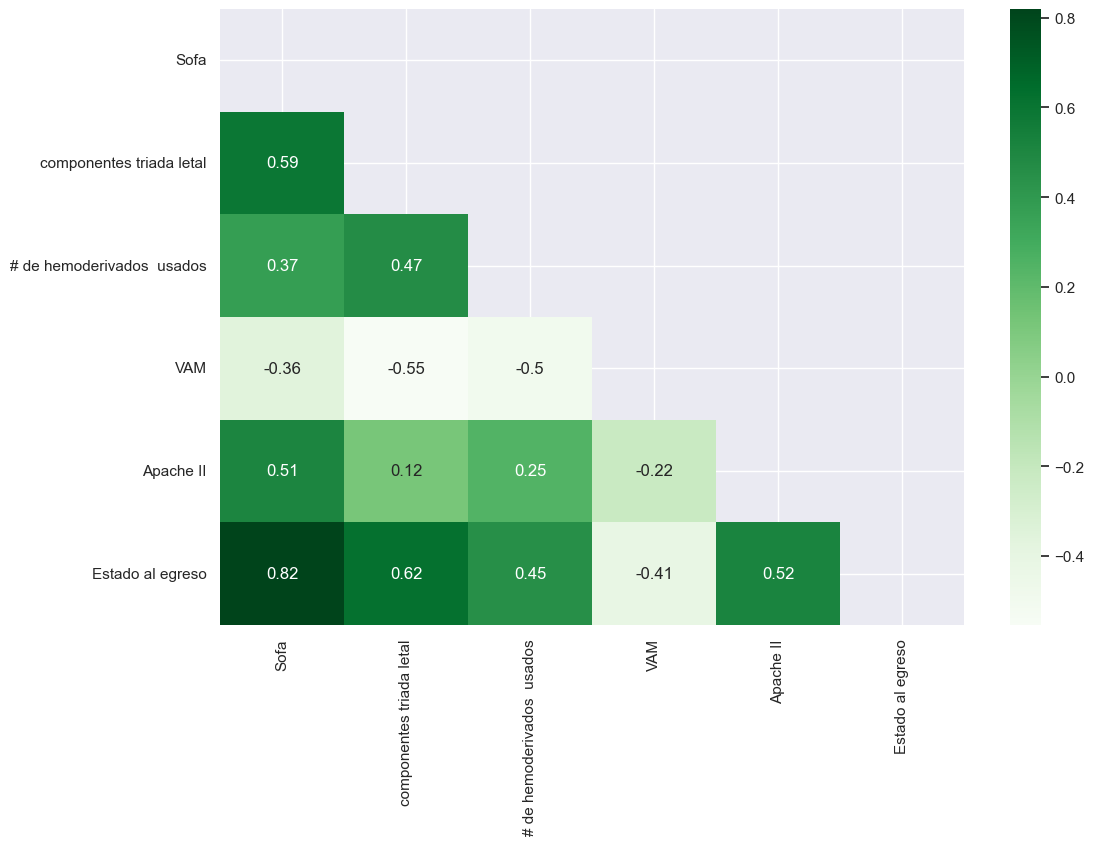

In [15]:
matrix = X[features].join(y).corr()
mask = np.triu(np.ones_like(matrix, dtype=bool))
plt.figure(figsize=(12,8))
sns.heatmap(matrix, annot=True, cmap='Greens', mask=mask)

In [22]:
new_data = X[features].join(y)
new_data.to_csv('../data/new_data.csv', index=False)